# Model selection and evaluation



**Model selection is the task of selecting a statistical model from a set of candidate models, given data. In the simplest cases, a pre-existing set of data is considered. However, the task can also involve the design of experiments such that the data collected is well-suited to the problem of model selection. Given candidate models of similar predictive or explanatory power, the simplest model is most likely to be the best choice**

In [29]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

#import machine learning
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC as svm

from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score, roc_auc_score #metrics
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from catboost import CatBoostClassifier, Pool
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_validate




In [2]:
from sklearn.preprocessing import minmax_scale

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [3]:
train = pd.read_csv("G_train_kickstarter.csv")
train.head()

,category,main_category,usd_goal_real,launch_month,launch_day,US,successful
0,78.770848,274.152506,4000.00,2,0,1,0
1,108.861149,186.174481,20000.00,3,1,1,0
2,69.275188,58.954158,22174.92,9,5,0,0
3,51.668593,382.116655,3000.00,7,1,1,0
4,65.779325,61.821647,10000.00,8,1,1,1


In [4]:
valid = pd.read_csv("G_valid_kickstarter.csv")
valid.head()

,category,main_category,usd_goal_real,launch_month,launch_day,US,successful
0,6.292030e+01,68.452716,5000.00,12,0,1,0
1,3.190776e+01,29.851113,1137.05,9,3,0,0
2,5.056555e+01,29.851113,11074.20,3,0,0,0
3,6.885630e+12,72.585066,1600.00,2,1,1,1
4,6.799627e+01,43.229951,17647.47,7,2,0,1


In [5]:
X = train.drop(['successful'], axis = 1)
y = train['successful']

In [6]:
#Splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [7]:
model_LR = LogisticRegressionCV(Cs=25, random_state=42, cv=5, max_iter=7, solver='newton-cg', n_jobs=-1)
model_LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=25, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=7, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)

**Fitting model with selected parameters**

              precision    recall  f1-score   support

           0       0.56      0.92      0.70     28529
           1       0.63      0.16      0.25     24157

    accuracy                           0.57     52686
   macro avg       0.60      0.54      0.48     52686
weighted avg       0.60      0.57      0.49     52686

Recall score 0.5718027559503474


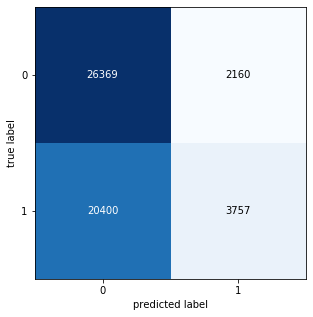

In [113]:
#Predicting model and building classification report and confusion matrix
y_pred_LR = model_LR.predict(X_test)
y_pred_LR

print(classification_report(y_test, y_pred_LR))

CM = confusion_matrix(y_test, y_pred_LR)
CM

fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))
rs_lr = recall_score(y_test,y_pred_LR, average='weighted')
print(f"Recall score {rs_lr}")

**We see from confusion matrix and clasiification report, that from logistic regression, accuracy is 0.60 and that is "ok" for our model. Also we calculate efficiency of model by recall, cause we we are dealing with money and better to predict "true porisitive" rate and "false positive" rate and it is recall. Recall for 0 class is  1 and for 1 class is 1, so we drop this model.Overall recall score is 0.57**

# NN from sklearn

In [9]:
#Building MLP Classifier with selected parameters
model_NN = MLPClassifier(
    warm_start=True, verbose=10, activation='tanh', 
    alpha=0.0007, hidden_layer_sizes=(50, 50, 50), solver='adam', 
    random_state=42, learning_rate='constant')
model_NN.fit(X_train, y_train)

Iteration 1, loss = 0.67585490
Iteration 2, loss = 0.67355342
Iteration 3, loss = 0.68081971
Iteration 4, loss = 0.67333829
Iteration 5, loss = 0.68096487
Iteration 6, loss = 0.68047501
Iteration 7, loss = 0.68012543
Iteration 8, loss = 0.68033647
Iteration 9, loss = 0.68099040
Iteration 10, loss = 0.67863702
Iteration 11, loss = 0.67423305
Iteration 12, loss = 0.67605790
Iteration 13, loss = 0.68265594
Iteration 14, loss = 0.68267940
Iteration 15, loss = 0.68742372
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=0.0007, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=True)

              precision    recall  f1-score   support

           0       0.55      0.99      0.71     28529
           1       0.73      0.04      0.08     24157

    accuracy                           0.55     52686
   macro avg       0.64      0.51      0.39     52686
weighted avg       0.63      0.55      0.42     52686

Recall score 0.5532209695175189


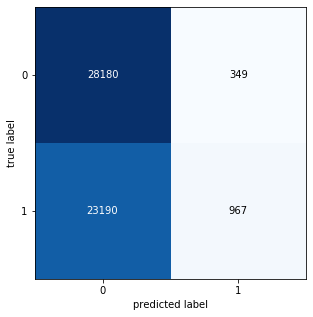

In [121]:
#Predicting model and building classification report and confusion matrix
y_pred_NN = model_NN.predict(X_test)
y_pred_NN

print(classification_report(y_test, y_pred_NN))

CM = confusion_matrix(y_test, y_pred_NN)

fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))
rs_nn = recall_score(y_test,y_pred_NN,  average='weighted')
print(f"Recall score {rs_nn}")

**For NN from skrlearn recall for 0 class is  0.98 and for 1 class is 0.07. So we better use NN instead of Logistic Regression. Overall recall score is 0.55**

# CatBoost

In [11]:
#Building CatBoost Classifier with selected parameters
model_cb = CatBoostClassifier(learning_rate=0.01, depth=8, l2_leaf_reg=100, 
                              loss_function = 'Logloss', border_count = 254, bagging_temperature=40, od_pval=500)
model_cb.fit(X_train, y_train)


0:	learn: 0.6919268	total: 115ms	remaining: 1m 55s
1:	learn: 0.6907602	total: 183ms	remaining: 1m 31s
2:	learn: 0.6896386	total: 240ms	remaining: 1m 19s
3:	learn: 0.6885822	total: 294ms	remaining: 1m 13s
4:	learn: 0.6874301	total: 348ms	remaining: 1m 9s
5:	learn: 0.6863588	total: 393ms	remaining: 1m 5s
6:	learn: 0.6853192	total: 452ms	remaining: 1m 4s
7:	learn: 0.6843239	total: 517ms	remaining: 1m 4s
8:	learn: 0.6832833	total: 571ms	remaining: 1m 2s
9:	learn: 0.6823317	total: 632ms	remaining: 1m 2s
10:	learn: 0.6814115	total: 689ms	remaining: 1m 1s
11:	learn: 0.6804022	total: 740ms	remaining: 1m
12:	learn: 0.6794359	total: 782ms	remaining: 59.3s
13:	learn: 0.6784905	total: 831ms	remaining: 58.5s
14:	learn: 0.6775805	total: 878ms	remaining: 57.7s
15:	learn: 0.6766850	total: 928ms	remaining: 57.1s
16:	learn: 0.6758932	total: 1s	remaining: 58s
17:	learn: 0.6751223	total: 1.08s	remaining: 58.8s
18:	learn: 0.6743004	total: 1.15s	remaining: 59.5s
19:	learn: 0.6735167	total: 1.21s	remaining: 

163:	learn: 0.6286846	total: 9.26s	remaining: 47.2s
164:	learn: 0.6286017	total: 9.31s	remaining: 47.1s
165:	learn: 0.6284852	total: 9.35s	remaining: 47s
166:	learn: 0.6284048	total: 9.39s	remaining: 46.9s
167:	learn: 0.6283326	total: 9.43s	remaining: 46.7s
168:	learn: 0.6282215	total: 9.48s	remaining: 46.6s
169:	learn: 0.6281311	total: 9.52s	remaining: 46.5s
170:	learn: 0.6280388	total: 9.56s	remaining: 46.4s
171:	learn: 0.6279684	total: 9.62s	remaining: 46.3s
172:	learn: 0.6278846	total: 9.67s	remaining: 46.2s
173:	learn: 0.6277836	total: 9.71s	remaining: 46.1s
174:	learn: 0.6276968	total: 9.75s	remaining: 46s
175:	learn: 0.6276204	total: 9.79s	remaining: 45.8s
176:	learn: 0.6275453	total: 9.83s	remaining: 45.7s
177:	learn: 0.6274238	total: 9.87s	remaining: 45.6s
178:	learn: 0.6273220	total: 9.91s	remaining: 45.5s
179:	learn: 0.6272333	total: 9.96s	remaining: 45.4s
180:	learn: 0.6271599	total: 10s	remaining: 45.3s
181:	learn: 0.6270841	total: 10.1s	remaining: 45.2s
182:	learn: 0.6270

324:	learn: 0.6200277	total: 16.2s	remaining: 33.6s
325:	learn: 0.6199684	total: 16.2s	remaining: 33.5s
326:	learn: 0.6199422	total: 16.2s	remaining: 33.4s
327:	learn: 0.6199107	total: 16.3s	remaining: 33.4s
328:	learn: 0.6198906	total: 16.4s	remaining: 33.4s
329:	learn: 0.6198551	total: 16.4s	remaining: 33.4s
330:	learn: 0.6198191	total: 16.5s	remaining: 33.3s
331:	learn: 0.6197936	total: 16.5s	remaining: 33.3s
332:	learn: 0.6197605	total: 16.6s	remaining: 33.2s
333:	learn: 0.6197235	total: 16.6s	remaining: 33.2s
334:	learn: 0.6197065	total: 16.7s	remaining: 33.1s
335:	learn: 0.6196879	total: 16.7s	remaining: 33.1s
336:	learn: 0.6196405	total: 16.8s	remaining: 33s
337:	learn: 0.6196216	total: 16.8s	remaining: 32.9s
338:	learn: 0.6195980	total: 16.9s	remaining: 32.9s
339:	learn: 0.6195742	total: 16.9s	remaining: 32.8s
340:	learn: 0.6195278	total: 16.9s	remaining: 32.8s
341:	learn: 0.6194961	total: 17s	remaining: 32.7s
342:	learn: 0.6194720	total: 17s	remaining: 32.7s
343:	learn: 0.6194

485:	learn: 0.6163438	total: 24.9s	remaining: 26.4s
486:	learn: 0.6163234	total: 25s	remaining: 26.3s
487:	learn: 0.6163116	total: 25.1s	remaining: 26.3s
488:	learn: 0.6163007	total: 25.1s	remaining: 26.3s
489:	learn: 0.6162773	total: 25.2s	remaining: 26.2s
490:	learn: 0.6162681	total: 25.3s	remaining: 26.2s
491:	learn: 0.6162454	total: 25.3s	remaining: 26.1s
492:	learn: 0.6162197	total: 25.4s	remaining: 26.1s
493:	learn: 0.6162013	total: 25.4s	remaining: 26.1s
494:	learn: 0.6161862	total: 25.5s	remaining: 26s
495:	learn: 0.6161701	total: 25.6s	remaining: 26s
496:	learn: 0.6161565	total: 25.6s	remaining: 25.9s
497:	learn: 0.6161398	total: 25.7s	remaining: 25.9s
498:	learn: 0.6161272	total: 25.7s	remaining: 25.9s
499:	learn: 0.6161091	total: 25.8s	remaining: 25.8s
500:	learn: 0.6160918	total: 25.9s	remaining: 25.8s
501:	learn: 0.6160697	total: 25.9s	remaining: 25.7s
502:	learn: 0.6160462	total: 26s	remaining: 25.7s
503:	learn: 0.6160334	total: 26.1s	remaining: 25.7s
504:	learn: 0.616022

645:	learn: 0.6140289	total: 34.4s	remaining: 18.9s
646:	learn: 0.6140145	total: 34.5s	remaining: 18.8s
647:	learn: 0.6139869	total: 34.6s	remaining: 18.8s
648:	learn: 0.6139754	total: 34.6s	remaining: 18.7s
649:	learn: 0.6139691	total: 34.7s	remaining: 18.7s
650:	learn: 0.6139591	total: 34.7s	remaining: 18.6s
651:	learn: 0.6139474	total: 34.8s	remaining: 18.6s
652:	learn: 0.6139286	total: 34.8s	remaining: 18.5s
653:	learn: 0.6139183	total: 34.9s	remaining: 18.4s
654:	learn: 0.6139094	total: 34.9s	remaining: 18.4s
655:	learn: 0.6138969	total: 34.9s	remaining: 18.3s
656:	learn: 0.6138856	total: 35s	remaining: 18.3s
657:	learn: 0.6138717	total: 35s	remaining: 18.2s
658:	learn: 0.6138581	total: 35.1s	remaining: 18.2s
659:	learn: 0.6138419	total: 35.2s	remaining: 18.1s
660:	learn: 0.6138278	total: 35.2s	remaining: 18.1s
661:	learn: 0.6138121	total: 35.3s	remaining: 18s
662:	learn: 0.6137983	total: 35.3s	remaining: 18s
663:	learn: 0.6137895	total: 35.4s	remaining: 17.9s
664:	learn: 0.613783

806:	learn: 0.6123627	total: 43.5s	remaining: 10.4s
807:	learn: 0.6123592	total: 43.5s	remaining: 10.3s
808:	learn: 0.6123413	total: 43.6s	remaining: 10.3s
809:	learn: 0.6123312	total: 43.6s	remaining: 10.2s
810:	learn: 0.6123229	total: 43.7s	remaining: 10.2s
811:	learn: 0.6123044	total: 43.7s	remaining: 10.1s
812:	learn: 0.6123034	total: 43.8s	remaining: 10.1s
813:	learn: 0.6122894	total: 43.8s	remaining: 10s
814:	learn: 0.6122802	total: 43.9s	remaining: 9.96s
815:	learn: 0.6122694	total: 43.9s	remaining: 9.9s
816:	learn: 0.6122637	total: 44s	remaining: 9.85s
817:	learn: 0.6122621	total: 44s	remaining: 9.79s
818:	learn: 0.6122573	total: 44s	remaining: 9.73s
819:	learn: 0.6122559	total: 44.1s	remaining: 9.68s
820:	learn: 0.6122468	total: 44.1s	remaining: 9.62s
821:	learn: 0.6122380	total: 44.2s	remaining: 9.57s
822:	learn: 0.6122322	total: 44.2s	remaining: 9.52s
823:	learn: 0.6122205	total: 44.3s	remaining: 9.46s
824:	learn: 0.6121991	total: 44.3s	remaining: 9.41s
825:	learn: 0.6121897

966:	learn: 0.6110434	total: 52.1s	remaining: 1.78s
967:	learn: 0.6110325	total: 52.1s	remaining: 1.72s
968:	learn: 0.6110208	total: 52.2s	remaining: 1.67s
969:	learn: 0.6110149	total: 52.2s	remaining: 1.61s
970:	learn: 0.6110060	total: 52.3s	remaining: 1.56s
971:	learn: 0.6109971	total: 52.4s	remaining: 1.51s
972:	learn: 0.6109908	total: 52.4s	remaining: 1.45s
973:	learn: 0.6109825	total: 52.5s	remaining: 1.4s
974:	learn: 0.6109746	total: 52.5s	remaining: 1.35s
975:	learn: 0.6109680	total: 52.6s	remaining: 1.29s
976:	learn: 0.6109571	total: 52.6s	remaining: 1.24s
977:	learn: 0.6109437	total: 52.7s	remaining: 1.18s
978:	learn: 0.6109378	total: 52.7s	remaining: 1.13s
979:	learn: 0.6109299	total: 52.8s	remaining: 1.08s
980:	learn: 0.6109188	total: 52.8s	remaining: 1.02s
981:	learn: 0.6109131	total: 52.8s	remaining: 969ms
982:	learn: 0.6109069	total: 52.9s	remaining: 914ms
983:	learn: 0.6109063	total: 52.9s	remaining: 860ms
984:	learn: 0.6108992	total: 53s	remaining: 807ms
985:	learn: 0.6

              precision    recall  f1-score   support

           0       0.67      0.72      0.69     28529
           1       0.64      0.58      0.61     24157

    accuracy                           0.66     52686
   macro avg       0.65      0.65      0.65     52686
weighted avg       0.65      0.66      0.65     52686

Recall score 0.6559996963140113


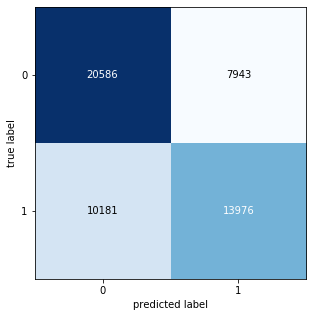

In [115]:
#Predicting model and building classification report and confusion matrix

y_pred_CB = model_cb.predict(X_test)
print(classification_report(y_test, y_pred_CB))

CM = confusion_matrix(y_test, y_pred_CB)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))
rs_cat = recall_score(y_test,y_pred_CB,  average='weighted')
print(f"Recall score {rs_cat}")

**For Catboost from skrlearn recall for 0 class is  0.71 and for 1 class is 0.59. Overall recall score is 0.65**

# Random Forest Classifier

In [13]:
#Building RF Classifier with selected parameters
clf_RF = RandomForestClassifier(max_depth=10, 
                                min_samples_leaf=1, 
                                min_samples_split=10, 
                                n_estimators=200, 
                                random_state=42)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
#Predicting model 
y_pred_RF = clf_RF.predict(X_test)
y_pred_RF

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [116]:
#Building classification report
print(classification_report(y_test, y_pred_RF))
rs_rf = recall_score(y_test,y_pred_RF, average='weighted')
print(f"Recall score {rs_rf}")

              precision    recall  f1-score   support

           0       0.66      0.73      0.70     28529
           1       0.64      0.56      0.60     24157

    accuracy                           0.66     52686
   macro avg       0.65      0.65      0.65     52686
weighted avg       0.65      0.66      0.65     52686

Recall score 0.6558288729453745


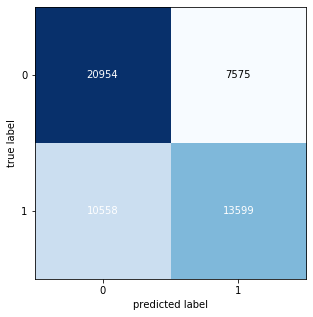

In [16]:
#Building confusion matrix
CM = confusion_matrix(y_test, y_pred_RF)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))

**For Random Forest recall for 0 class is  0.73 and for 1 class is 0.5. Overall recall score is 0.65, that is a bit better, than NN**

# Adaboost Classifier

In [17]:
#Building Adaboost Classifier with selected parameters
clf_ADAB = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=1000,
    learning_rate=.01
)

clf_ADAB.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [18]:
y_pred_ADAB = clf_ADAB.predict(X_test)
y_pred_ADAB

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [117]:
print(classification_report(y_test, y_pred_ADAB))
rs_ada = recall_score(y_test,y_pred_ADAB, average='weighted')
print(f"Recall score {rs_ada}")


              precision    recall  f1-score   support

           0       0.64      0.74      0.69     28529
           1       0.62      0.50      0.56     24157

    accuracy                           0.63     52686
   macro avg       0.63      0.62      0.62     52686
weighted avg       0.63      0.63      0.63     52686

Recall score 0.632293208822078


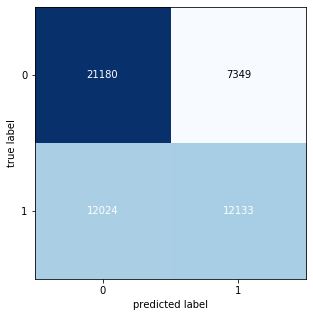

In [20]:
CM = confusion_matrix(y_test, y_pred_ADAB)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))

**For AdaBoost recall for 0 class is  0.74 and for 1 class is 0.5. Overall recall score is 0.63.**

# XgBoost classifier

In [21]:
#Building XGBoost Classifier with selected parameters
model_xgb = XGBClassifier(gamma=0.2,
                      learning_rate=0.1,
                      max_depth=5,
                      min_child_weight=5,
                      n_estimators=500,
                      reg_alpha=1,
                      reg_lambda=1)
# fit the model with the training data
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     28529
           1       0.64      0.60      0.62     24157

    accuracy                           0.66     52686
   macro avg       0.66      0.66      0.66     52686
weighted avg       0.66      0.66      0.66     52686

Recall score 0.6601563982841742


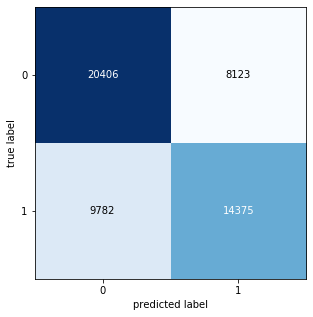

In [118]:
#Predicting model and building classification report and cofusion matrix
pred=model_xgb.predict(X_test)
print(classification_report(y_test, pred))
CM = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))
rs_xg = recall_score(y_test,pred, average='weighted')
print(f"Recall score {rs_xg}")

**For XGBoost recall for 0 class is  0.72 and for 1 class is 0.6. Overall recall score is 0.66, that is little bit better, than RandomForest. So we choose this model for this dataset**

In [91]:
results =[0.68,rs_ada,rs_rf,rs_nn, rs_lr, rs_cat ]
names = ['XGBoost', 'ADABoost','Random_Forest','NeuralNetwork','Logistic Regression' ,'Catboost']


In [122]:
models = pd.DataFrame({
    'Model': ['XGBoost', 'ADABoost','Random_Forest','NeuralNetwork','Logistic Regression' ,'Catboost'],
    'Recall Score': [0.68, rs_ada, rs_rf, 
              rs_nn, rs_lr, rs_cat]})
models.sort_values(by='Recall Score', ascending=False)


,Model,Recall Score
0,XGBoost,0.680000
5,Catboost,0.656000
2,Random_Forest,0.655829
1,ADABoost,0.632293
4,Logistic Regression,0.571803
3,NeuralNetwork,0.553221


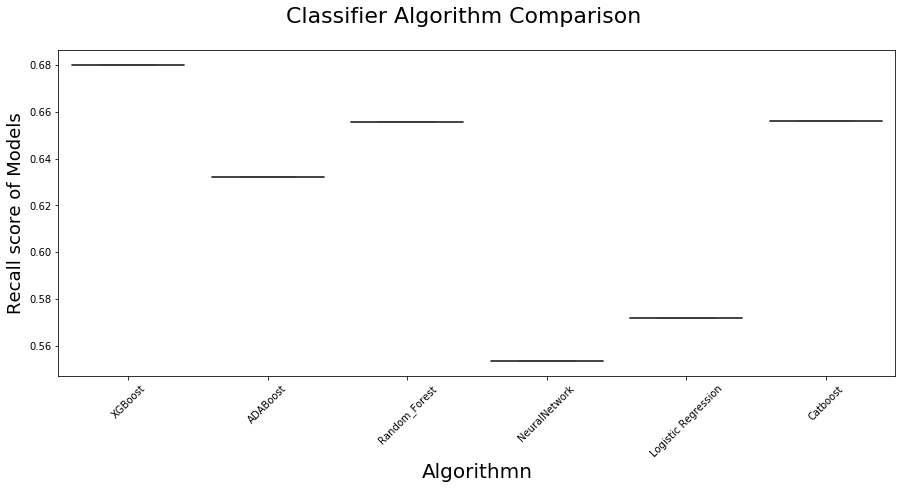

In [111]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Recall score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Conclusion

**We show, that XGBoost model is the best model for our dataset. Model has recall score - 0.68<br>
There are several ways to improve our model:**
* **Create feature - 1st deposit  - how much money project outhor can add to his project and calculate it as percentage of goal**
* **Creating new features in the process of raising money - it definatelly increase model score**